In [226]:
source("../00_model-fitting/wwa_model-fitting.R")

---
## **99th %ile of FWI (EJB)**

In [251]:
df <- merge(read.csv("data/fwi99_EJB.csv")[,-1],
            load_ts("ts/drc-rw-floods_gmst-smoothed.dat", col.names = c("year", "gmst")))
df <- df[df$year > 1940,]   # this year looks very low - possibly due to absence of antecedent data?
gmst_2023 = df$gmst[df$year == 2023]
fwi_2023 = df$FWI99[df$year == 2023]

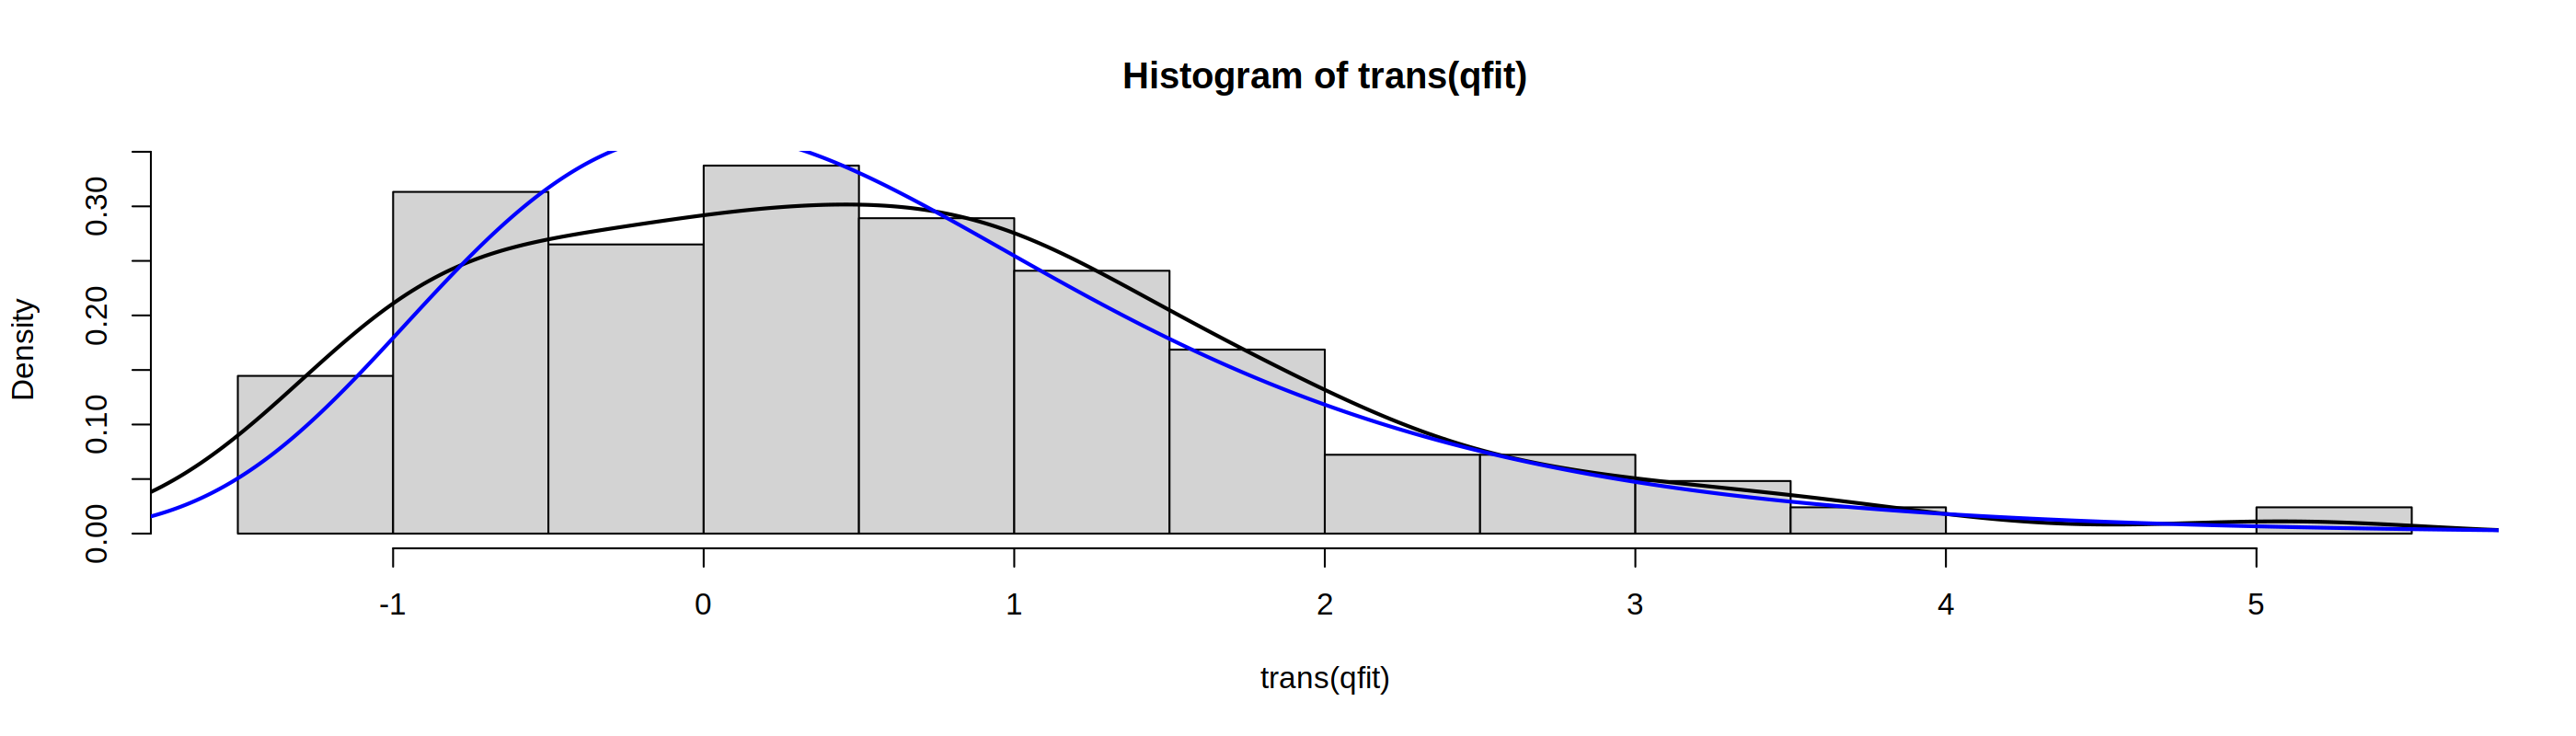

In [252]:
# check GEV fit to data
qfit <- fevd(FWI99, df, location.fun = ~gmst)

hist(trans(qfit), breaks = "fd", prob = T)
lines(density(trans(qfit)), lwd = 2)
lines(seq(-3,15,0.01), devd(seq(-3,15,0.01)), col = "blue", lwd = 2)

In [253]:
# fit some models
fwi99_gev_shift <- fit_ns("gev", "shift", df, "FWI99", "gmst", lower = F)
fwi99_gev_fd <- fit_ns("gev", "fixeddisp", df, "FWI99", "gmst", lower = F)

fwi99_gev_shift_x <- fit_ns("gev", "shift", df[df$year < 2023,], "FWI99", "gmst", lower = F)
fwi99_gev_fd_x <- fit_ns("gev", "fixeddisp", df[df$year < 2023,], "FWI99", "gmst", lower = F)

# overwrite data to include 2023, even where fit excluded it
fwi99_gev_shift_x$data <- fwi99_gev_fd_x$data <- df
fwi99_gev_shift_x$x <- fwi99_gev_fd_x$x <- df$FWI99
fwi99_gev_shift_x$cov1 <- fwi99_gev_fd_x$cov1 <- df$gmst
fwi99_gev_shift_x$ev_idx <- fwi99_gev_fd_x$ev_idx <- 84

models <- list(shift = fwi99_gev_shift, fd = fwi99_gev_fd, shift_x = fwi99_gev_shift_x, fd_x = fwi99_gev_fd_x)

In [254]:
# compare log-likelihoods excluding the 2023 event
lapply(models, function(mdl) ns_loglik(mdl$par, cov1 = df$gmst[df$year < 2023], x = df$FWI99[df$year < 2023], dist = mdl$dist, fittype = mdl$type))

$shift
[1] 168.619

$fd
[1] 168.442

$shift_x
[1] 168.2958

$fd_x
[1] 168.2122

In [255]:
# compare log-likelihoods including the 2023 event
lapply(models, function(mdl) ns_loglik(mdl$par, cov1 = df$gmst, x = df$FWI99, dist = mdl$dist, fittype = mdl$type))

$shift
[1] 174.1621

$fd
[1] 173.0407

$shift_x
[1] 174.6609

$fd_x
[1] 173.3423

In [269]:
lapply(lapply(models, "[[", "par"), "[", "alpha")

$shift
   alpha 
1.979459 

$fd
  alpha 
3.02341 

$shift_x
   alpha 
1.927655 

$fd_x
   alpha 
2.520316

In [257]:
prep_window(c(1,3))
png("fig/fwi99_ejb_shift-included.png", height = 480, width = 480 * 3); {
    par(mfrow = c(1,3), cex = 1.4)
    plot_trend(fwi99_gev_shift, legend_pos = NA, ylim = c(0,20))
    plot_returnlevels(fwi99_gev_shift, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, legend_pos = NA, nsamp = 500, ylim = c(0,20))
    plot_gmsttrend(fwi99_gev_shift, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, legend_pos = NA, ylim = c(0,20))
    mtext("FWI99_EJB: shift fit, include event", outer = T, line = -2.5, font = 2, cex = 1.4)    
}; dev.off()

png 
  2

In [258]:
prep_window(c(1,3))
png("fig/fwi99_ejb_fixeddisp-included.png", height = 480, width = 480 * 3); {
    par(mfrow = c(1,3), cex = 1.4)
    plot_trend(fwi99_gev_fd, legend_pos = NA, ylim = c(0,20))
    plot_returnlevels(fwi99_gev_fd, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, legend_pos = NA, nsamp = 500, ylim = c(0,20))
    plot_gmsttrend(fwi99_gev_fd, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, legend_pos = NA, ylim = c(0,20))
    mtext("FWI99_EJB: fixed-dispersion fit, include event", outer = T, line = -2.5, font = 2, cex = 1.4)
}; dev.off()

png 
  2

In [259]:
prep_window(c(1,3))
png("fig/fwi99_ejb_shift-excluded.png", height = 480, width = 480 * 3); {
    par(mfrow = c(1,3), cex = 1.4)
    plot_trend(fwi99_gev_shift_x, legend_pos = NA, ylim = c(0,20))
    plot_returnlevels(fwi99_gev_shift_x, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, legend_pos = NA, nsamp = 500, ylim = c(0,20))
    plot_gmsttrend(fwi99_gev_shift_x, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, legend_pos = NA, ylim = c(0,20))
    mtext("FWI99_EJB: shift fit, exclude event", outer = T, line = -2.5, font = 2, cex = 1.4)
}; dev.off()

png 
  2

In [260]:
prep_window(c(1,3))
png("fig/fwi99_ejb_fixeddisp-excluded.png", height = 480, width = 480 * 3); {
    par(mfrow = c(1,3), cex = 1.4)
    plot_trend(fwi99_gev_fd_x, legend_pos = NA, ylim = c(0,20))
    plot_returnlevels(fwi99_gev_fd_x, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, legend_pos = NA, nsamp = 500, ylim = c(0,20))
    plot_gmsttrend(fwi99_gev_fd_x, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, legend_pos = NA, ylim = c(0,20))
    mtext("FWI99_EJB: fixed-dispersion fit, exclude event", outer = T, line = -2.5, font = 2, cex = 1.4)
}; dev.off()

png 
  2

In [270]:
lapply(models, return_period, x = fwi_2023, fixed_cov = gmst_2023)

$shift
[1] 164.1019

$fd
[1] 60.1383

$shift_x
[1] 592.1877

$fd_x
[1] 133.2395

In [262]:
lapply(models, function(m) int_change(m, rp = 100, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, relative = T))

$shift
[1] 20.30197

$fd
[1] 67.95685

$shift_x
[1] 21.71757

$fd_x
[1] 56.6212

In [263]:
lapply(models, prob_ratio, ev = fwi_2023, cov = gmst_2023, cov_cf = gmst_2023 - 1.2)

$shift
[1] 4.704421

$fd
[1] 4011.165

$shift_x
[1] 13.852

$fd_x
[1] 108108.7

---
## **Cumulative DSR (EJB)**

In [34]:
df <- merge(read.csv("data/cumdsr_EJB.csv", col.names = c("X", "year", "cDSR"))[,-1],
            load_ts("ts/drc-rw-floods_gmst-smoothed.dat", col.names = c("year", "gmst")))
gmst_2023 = df$gmst[df$year == 2023]
cdsr_2023 = df$cDSR[df$year == 2023]

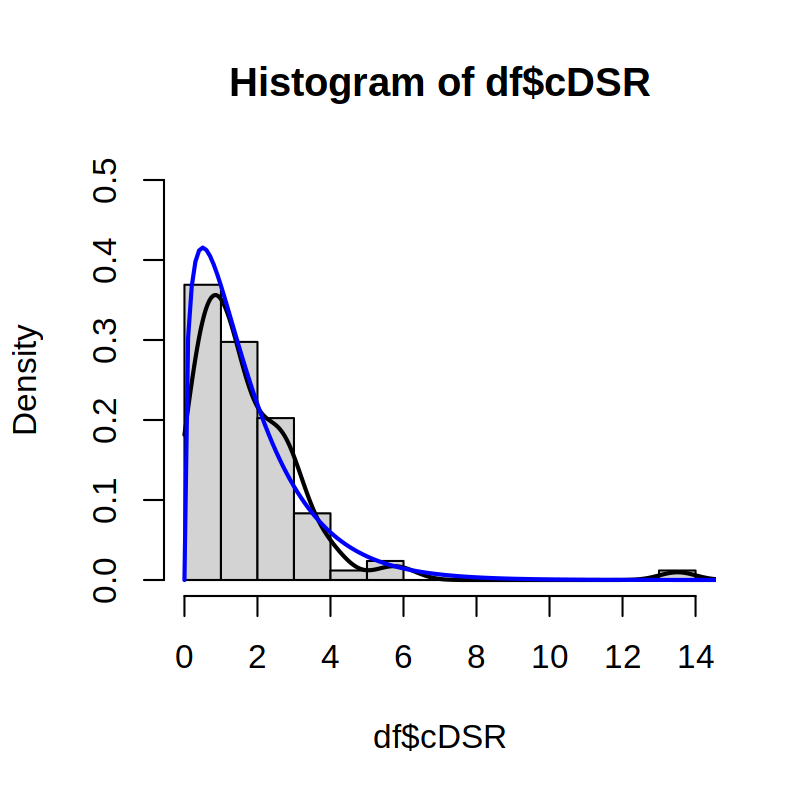

In [5]:
# check GEV fit to data (GEV not appropriate, but useful to examine)
prep_window(c(1,1))

hist(df$cDSR, breaks = "fd", prob = T, ylim = c(0,0.5))
lines(density(df$cDSR, from = 0, to = 15), lwd = 2)
lines(seq(0,15,0.1), dgamma(seq(0,15,0.1), shape = MASS::fitdistr(df$cDSR, "gamma")$est["shape"], rate = MASS::fitdistr(df$cDSR, "gamma")$est["rate"]), col = "blue", lwd = 2)

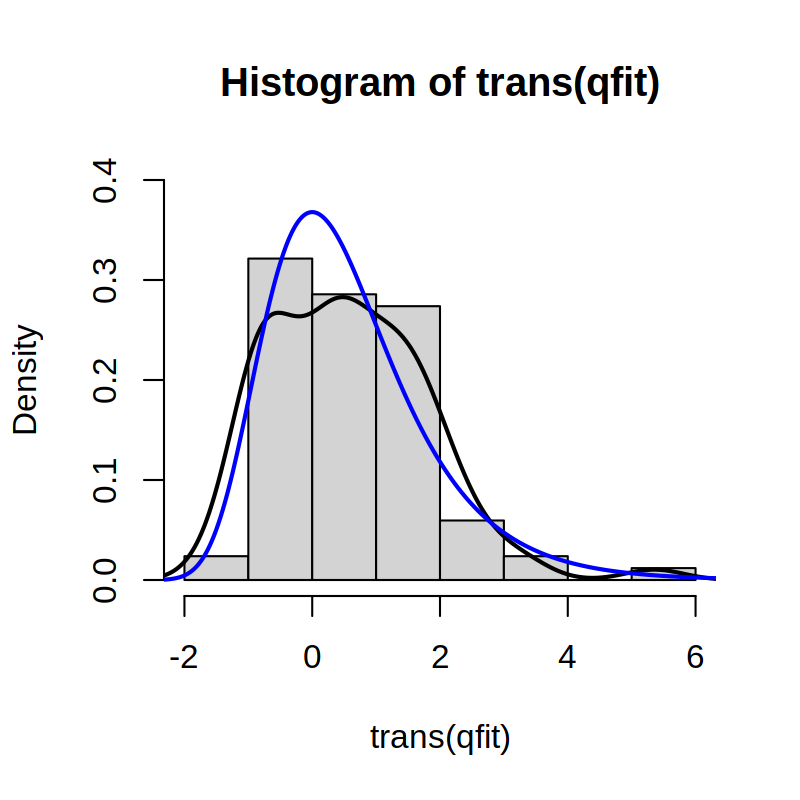

In [27]:
# quick check of GEV fit to data
qfit <- fevd(cDSR, df, location.fun = ~gmst)

prep_window(c(1,1))
hist(trans(qfit), breaks = "fd", prob = T, ylim = c(0,0.4))
lines(density(trans(qfit)), lwd = 2)
lines(seq(-3,15,0.01), devd(seq(-3,15,0.01)), col = "blue", lwd = 2)

In [30]:
qfit$results$par
cdsr_fit$par

mu0       mu1     scale     shape 
1.3158191 0.5481326 0.7543494 0.3574560

mu0    sigma0     alpha     shape 
1.3160166 0.7543274 0.5483160 0.3572821

In [22]:
cdsr_fit <- fit_ns("gev", "shift", df, "cDSR", "gmst", lower = F)

In [31]:
prep_window(c(1,3))
png("fig/cdsr_ejb_gev-shift.png", height = 480, width = 480 * 3); {
    par(mfrow = c(1,3), cex = 1.4)
    plot_trend(cdsr_fit, legend_pos = NA, ylim = c(0,20))
    plot_returnlevels(cdsr_fit, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, legend_pos = NA, nsamp = 500, ylim = c(0,20))
    plot_gmsttrend(cdsr_fit, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, legend_pos = NA, ylim = c(0,20))
    mtext("cumDSR_EJB: GEV, shift with GMST", outer = T, line = -2.5, font = 2, cex = 1.4)
}; dev.off()

In [73]:
df <- merge(merge(read.csv("data/cumdsr_EJB.csv", col.names = c("X", "year", "cDSR"))[,-1],
            load_ts("ts/drc-rw-floods_gmst-smoothed.dat", col.names = c("year", "gmst"))),
            read.csv("data/fwi99_EJB.csv")[,-1])

ds_line <- line(df$FWI99, sqrt(df$cDSR))

# relationship between square root of cumulative DSR & FWI99 is linear
prep_window(c(1,1))
png("fig/cdsr_fwi.png", height = 480, width = 480); {
    par(mfrow = c(1,1), cex = 1.4, pch = 20, mar = c(4,4,1,1))
    plot(df$FWI99, sqrt(df$cDSR))
    abline(ds_line)
}; dev.off()

png 
  2

---
## **Cumulative area exceeding percentile**

In [202]:
df <- merge(read.csv("data/cumulative_area_exceeding_percentile.csv", col.names = c("X", "year", "a90", "a99", "a99.9", "a99.99"))[,c("year", "a99")],
            load_ts("ts/drc-rw-floods_gmst-smoothed.dat", col.names = c("year", "gmst")))
df$a99m <- df$a99 / 1e6
df$rt_a99 <- sqrt(df$a99)

gmst_2023 = df$gmst[df$year == 2023]

Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”
Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”


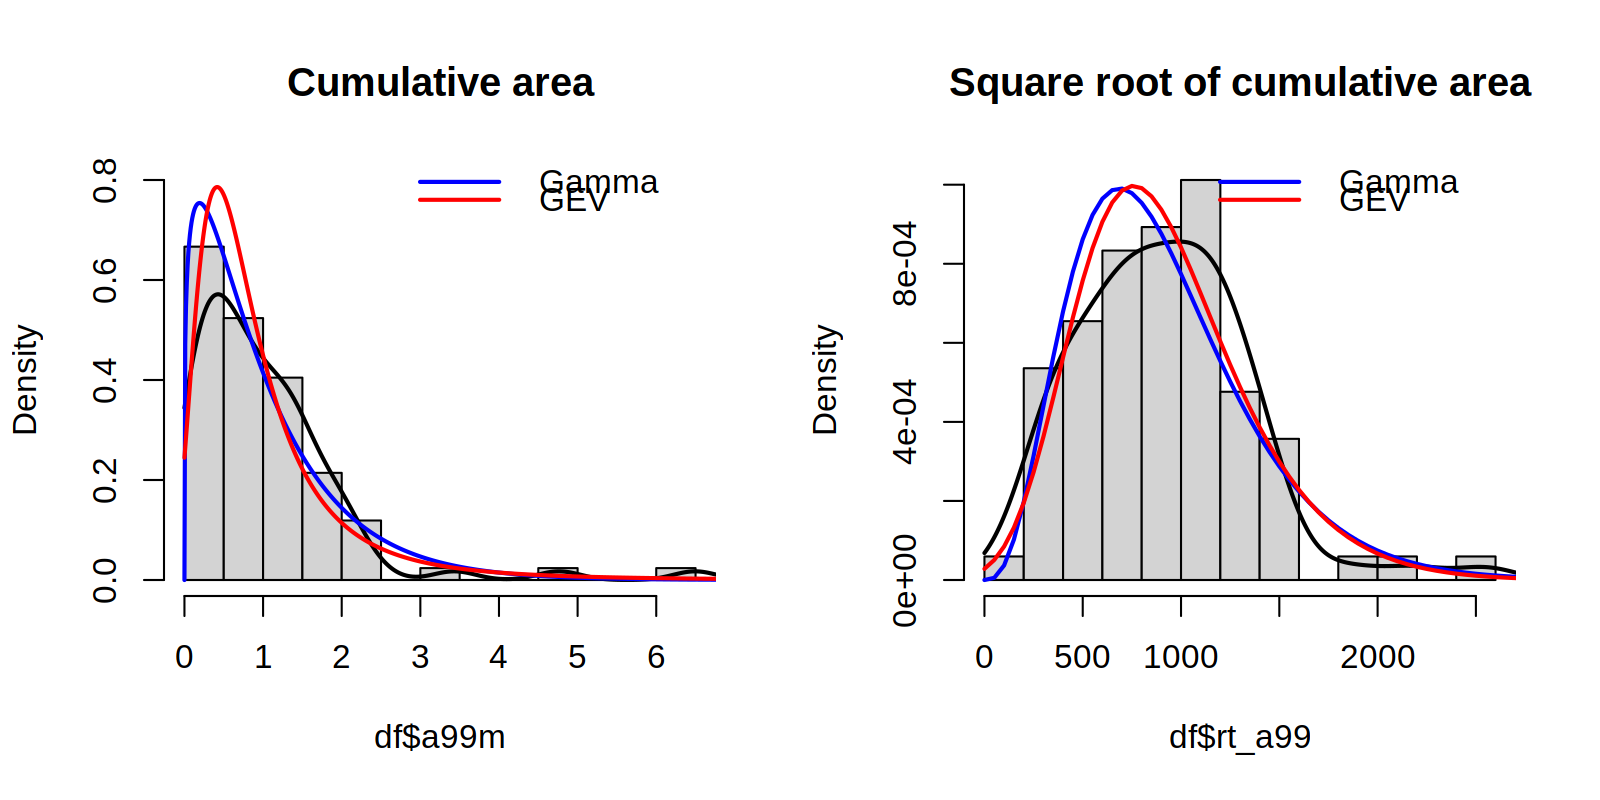

In [203]:
prep_window(c(1,2))

a99m_x <- seq(0,8,0.01)
qgev_am <- fevd(df$a99m, data = df)$results$par

qgev_rt <- fevd(df$rt_a99, data = df)$results$par
rt_a99_x <- seq(0,3000,50)

# png("fig/cumulative-area-histograms.png", height = 480, width = 480 * 2); {
#     par(mfrow = c(1,2), cex = 1.4)
    hist(df$a99m, breaks = "fd", prob = T, ylim = c(0,0.8), main = "Cumulative area")
    lines(density(df$a99m, from = 0), lwd = 2)
    lines(a99m_x, dgamma(a99m_x, shape = MASS::fitdistr(df$a99m, "gamma")$est["shape"], rate = MASS::fitdistr(df$a99m, "gamma")$est["rate"]), col = "blue", lwd = 2)
    lines(a99m_x, devd(a99m_x, loc = qgev_am["location"], scale = qgev_am["scale"], shape = qgev_am["shape"]), col = "red", lwd = 2)
    legend("topright", legend = c("Gamma", "GEV"), lty = 1, col = c("blue", "red"), lwd = 2, bty = "n")
    
    hist(df$rt_a99, breaks = "fd", prob = T, main = "Square root of cumulative area")
    lines(density(df$rt_a99, from = 0), lwd = 2)
    lines(rt_a99_x, dgamma(rt_a99_x, shape = MASS::fitdistr(df$rt_a99, "gamma")$est["shape"], rate = MASS::fitdistr(df$rt_a99, "gamma")$est["rate"]), col = "blue", lwd = 2)
    lines(rt_a99_x, devd(rt_a99_x, loc = qgev_rt["location"], scale = qgev_rt["scale"], shape = qgev_rt["shape"]), col = "red", lwd = 2)
    legend("topright", legend = c("Gamma", "GEV"), lty = 1, col = c("blue", "red"), lwd = 2, bty = "n")

# }; dev.off()

In [165]:
# what would a fitted GEV look like?
area_fit <- fit_ns("gev", "shift", df, "a99m", "gmst", lower = F)

prep_window(c(1,3))
png("fig/a99m_gev-shift.png", height = 480, width = 480 * 3); {
    par(mfrow = c(1,3), cex = 1.4, pch = 20)
    plot_trend(area_fit, legend_pos = NA)
    plot_returnlevels(area_fit, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, legend_pos = NA, nsamp = 500)
    plot_gmsttrend(area_fit, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, legend_pos = NA)
    mtext("Cumulative area over FWI99: shift-fit GEV", outer = T, line = -2.5, font = 2, cex = 1.4)
}; dev.off()

png 
  2

In [166]:
# GEV fitted to square root of area?
rt_area_fit <- fit_ns("gev", "shift", df, "rt_a99", "gmst", lower = F)

prep_window(c(1,3))
png("fig/a99rt_gev-shift.png", height = 480, width = 480 * 3); {
    par(mfrow = c(1,3), cex = 1.4)
    plot_trend(rt_area_fit, legend_pos = NA)
    plot_returnlevels(rt_area_fit, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, legend_pos = NA, nsamp = 500)
    plot_gmsttrend(rt_area_fit, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, legend_pos = NA)
    mtext("Square root of cumulative area over FWI99: shift-fit GEV", outer = T, line = -2.5, font = 2, cex = 1.4)
}; dev.off()

### **Fit gamma distribution to cumulative area**

Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”


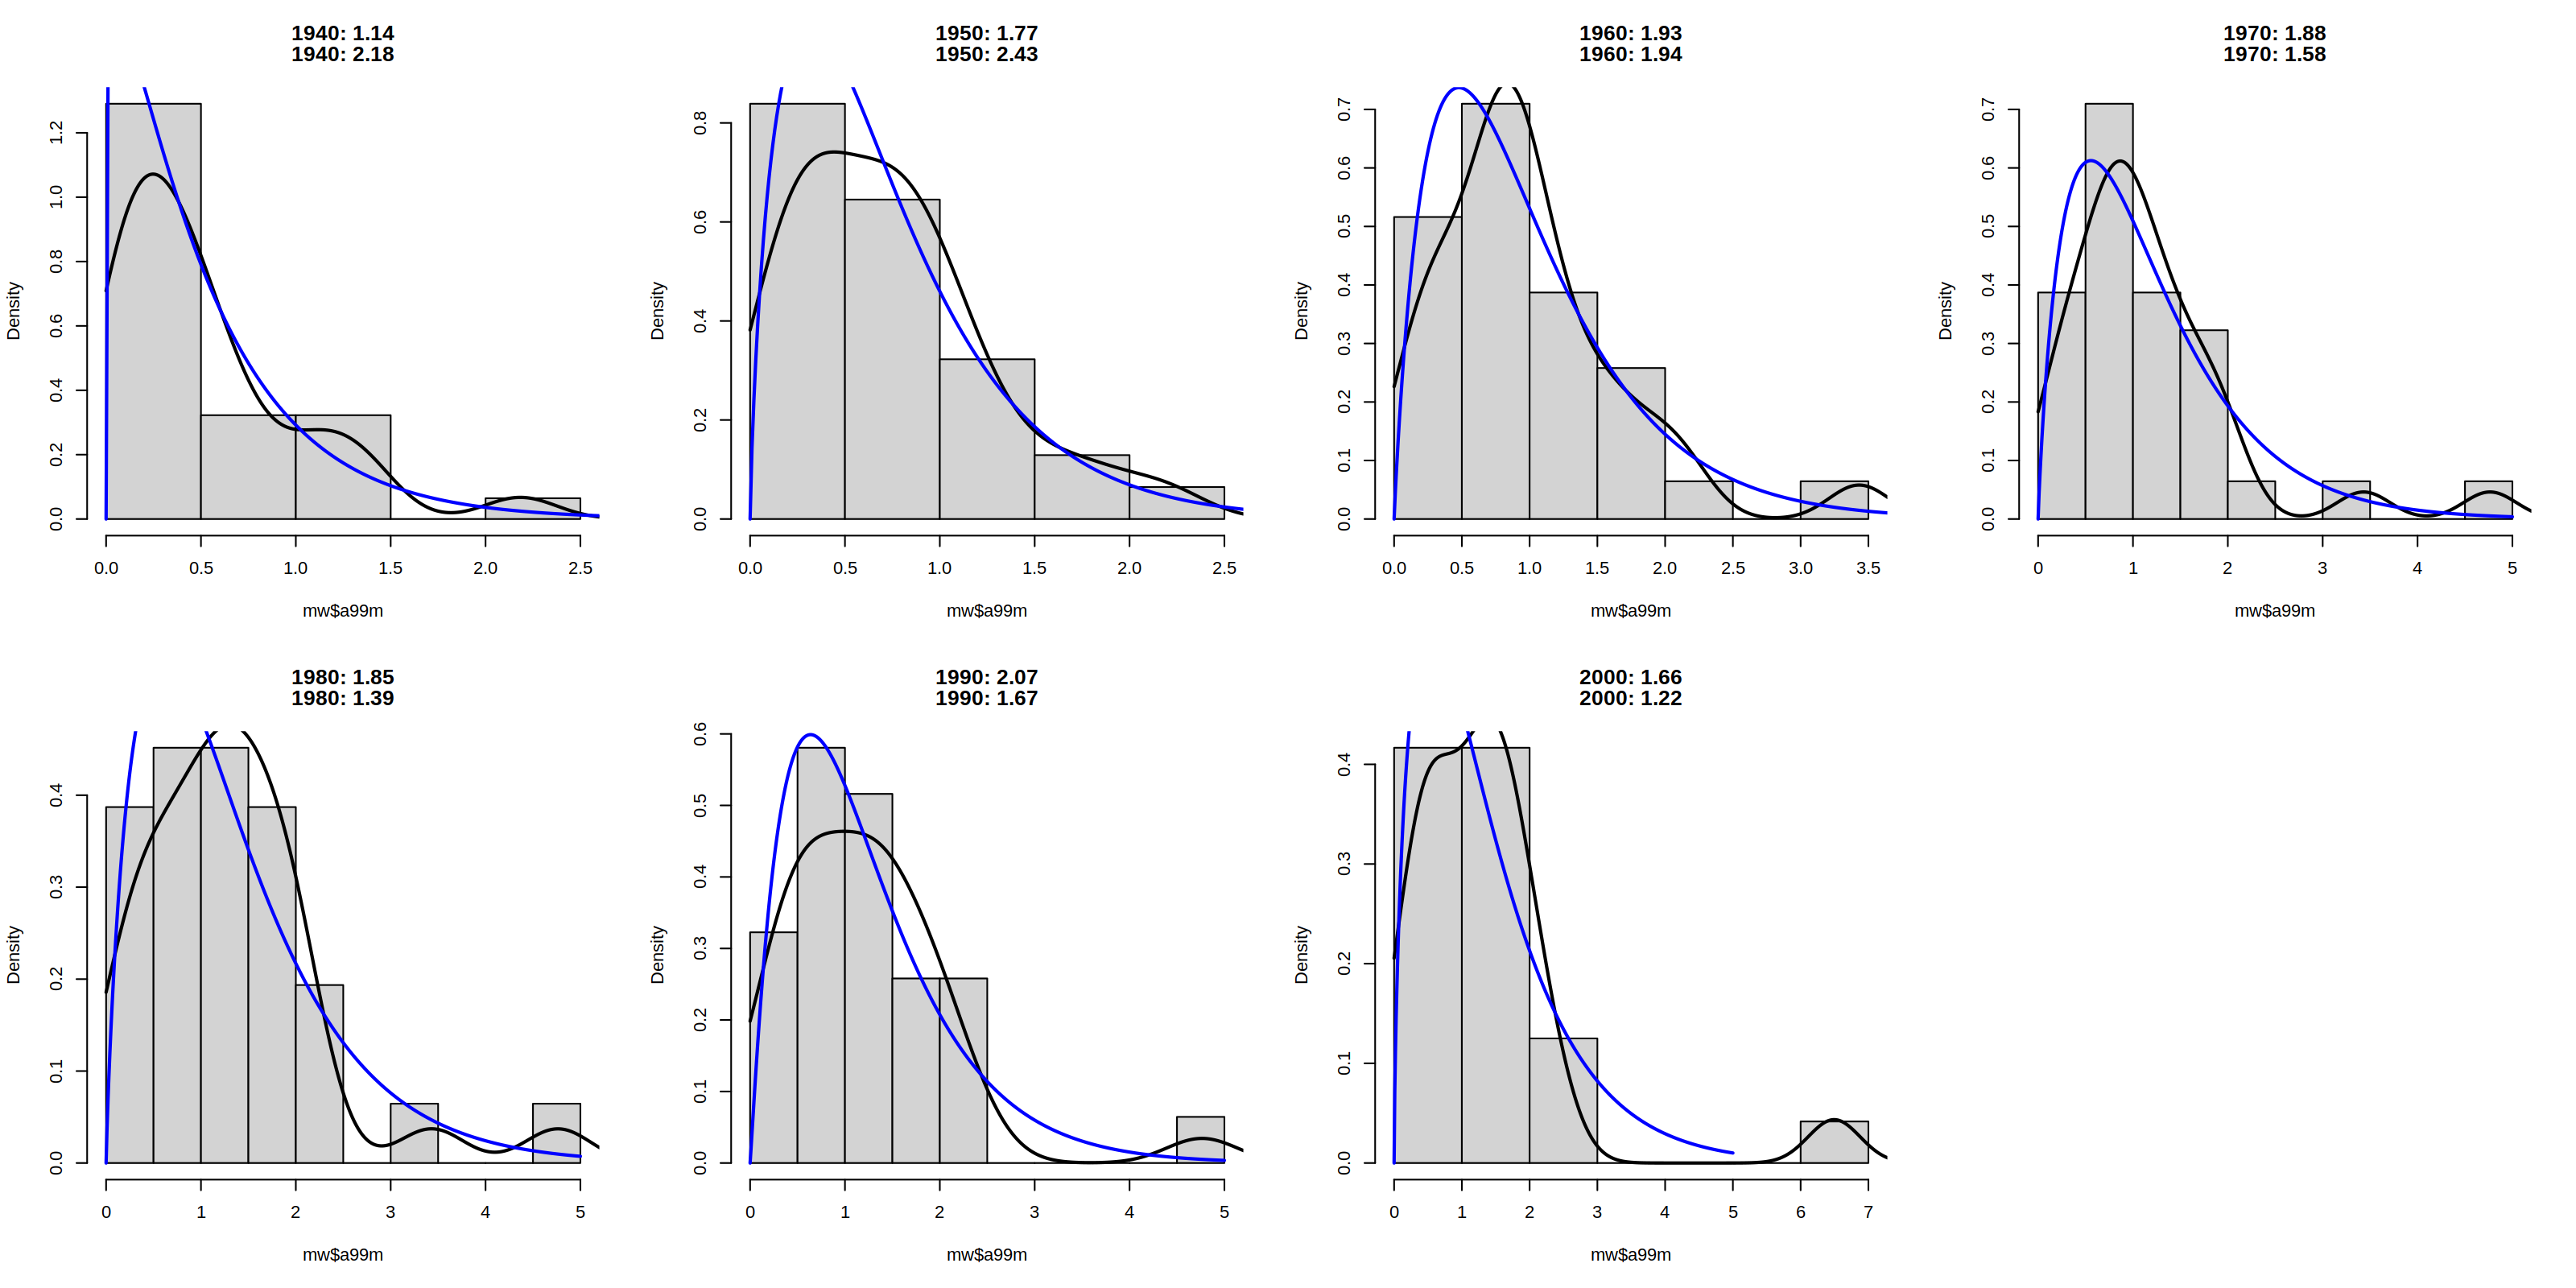

In [39]:
# Any evidence for change in distribution, if we look at moving window?

# plot(0, type = "n", xlim = c(0,2.5), ylim = c(0,1.5))

ys <- seq(1940,2000,10)
x <- seq(0,5,0.01)

prep_window(c(2,4))
invisible(sapply(ys, function(y) {
    mw <- df[(df$year >= y) & (df$year <= y+30),]
    gfit <- MASS::fitdistr(mw$a99m, "gamma")$est
    
    hist(mw$a99m, breaks = "fd", prob = T, main = paste0(y, ": ", round(gfit, 2)))
    lines(density(mw$a99m, from = 0), lwd = 2)
    lines(x, dgamma(x, shape = gfit["shape"], rate = gfit["rate"]), col = "blue", lwd = 2)
}))

In [48]:
source("../00_model-fitting/wwa_model-fitting.R")
library(MASS)

gamma_fixeddisp <- function(pars = c(rate, shape, alpha, beta), covariate, x) {
    
    # allow both rate and shape to vary with covariate
    ns_rate = pars["rate"] * exp(pars["alpha"] * covariate)
    ns_shape = pars["shape"] * exp(pars["beta"] * covariate)
    
    # return negative log-likelihood to be minimised
    return(-sum(dgamma(x, shape = ns_shape, rate = ns_rate, log = T)))
}

fgamma <- function(x, covariate, data, method = "MLE", type = "fixeddisp", optim.method = "Nelder-Mead", init = NA, ...) {
        
    mtype <- "gamma_fixeddisp"
    
    if(is.na(init[1])) init <- c(fitdistr(data[,x], "gamma")$estimate, "alpha" = 0, "beta" = 0)
            
    # need to sort out a better way to estimate starting parameters
    res <- list("results" = suppressWarnings(optim(par = init, gamma_fixeddisp, covariate = data[,covariate], x = data[,x], method = optim.method)),
                fittype = method,
                method = optim.method, 
                type = mtype,
                x = data[,x],
                cov.data = data,
                cov.name = covariate,
                var.name = x,
                ...)
    
    return(res)
}

In [44]:
df <- merge(read.csv("data/cumulative_area_exceeding_percentile.csv", col.names = c("X", "year", "a90", "a99", "a99.9", "a99.99"))[,c("year", "a99")],
            load_ts("ts/drc-rw-floods_gmst-smoothed.dat", col.names = c("year", "gmst")))
df$a99m <- df$a99 / 1e6

gmst_2023 = df$gmst[df$year == 2023]

In [45]:
gfit <- fgamma("a99m", "gmst", df)

In [45]:
# get nonstationary parameters
ns_rate = gfit$results$par["rate"] * exp(gfit$results$par["alpha"] * df$gmst)
ns_shape = gfit$results$par["shape"] * exp(gfit$results$par["beta"] * df$gmst)

In [114]:
# get quantiles
pit <- sapply(1:length(df$a99m), function(i) pgamma(df$a99m[i], shape = ns_shape[i], rate = ns_rate[i]))

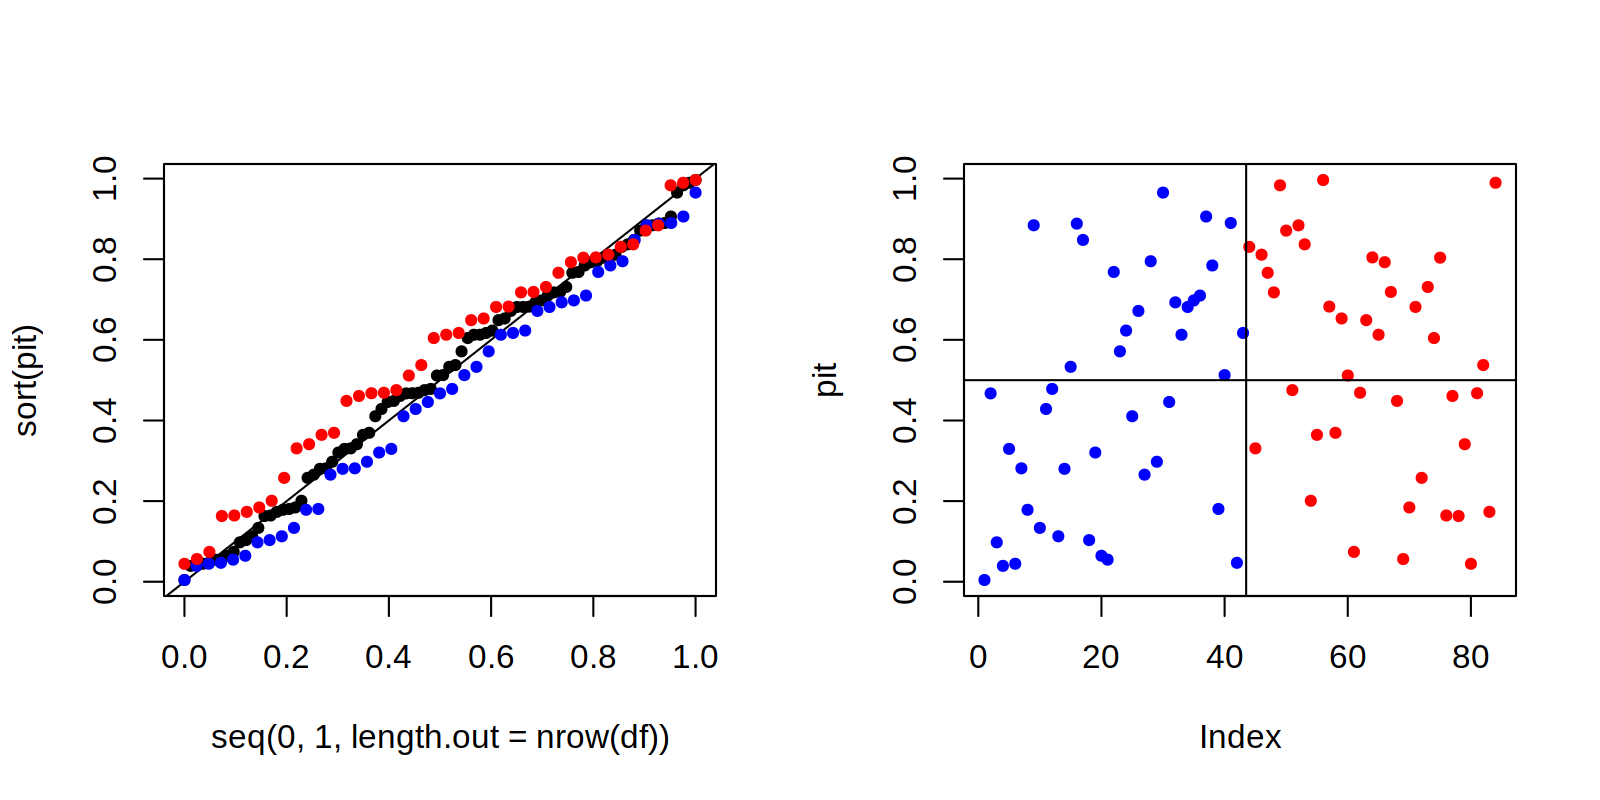

In [115]:
prep_window(c(1,2))

# overall the model gets the quantiles pretty well
plot(seq(0,1,length.out = nrow(df)), sort(pit), pch = 20)
abline(0,1)

# slight difference between the two halves of the distribution, but nothing major
points(seq(0,1,length.out = 43), sort(pit[1:43]), col = "blue")
points(seq(0,1,length.out = 42), sort(pit[43:85]), col = "red")

plot(pit, col = c(rep("blue", 43), rep("red", 42)))
abline(h = 0.5, v = 43.5)

In [126]:
rate_2023 <- gfit$results$par["rate"] * exp(gfit$results$par["alpha"] * gmst_2023)
shape_2023 <- gfit$results$par["shape"] * exp(gfit$results$par["beta"] * gmst_2023)
rate_cf <- gfit$results$par["rate"] * exp(gfit$results$par["alpha"] * (gmst_2023 - 1.2))
shape_cf <- gfit$results$par["shape"] * exp(gfit$results$par["beta"] * (gmst_2023 - 1.2))

rp_x <- unique(c(seq(1.1,2,0.1), seq(2,100,1), seq(100,1000,10), seq(100,1000,100)))
rp_th <- 1/seq(1,0,length.out = nrow(df)+2)[2:(nrow(df)+1)]      

rl_curve_pres <- qgamma(1/rp_x, rate = rate_2023, shape = shape_2023, lower.tail = F)
rl_curve_cf <- qgamma(1/rp_x, rate = rate_cf, shape = shape_cf, lower.tail = F)

rl_obs_pres <- qgamma(pit, rate = rate_2023, shape = shape_2023)
rl_obs_cf <- qgamma(pit, rate = rate_cf, shape = shape_cf)

rp_event_pres <- 1/pgamma(df$a99m[df$year == 2023], rate = rate_2023, shape = shape_2023, lower.tail = F)
rp_event_cf <- 1/pgamma(df$a99m[df$year == 2023], rate = rate_cf, shape = shape_cf, lower.tail = F)

In [ ]:
prep_window(c(1,3))
ylim <- c(0,8)

png("fig/a99m_gamma.png", height = 480, width = 480 * 3); par(mfrow = c(1,3), cex = 1.4); {

    {
        # GMST trend - maybe robust parameter estimation would help? 
        plot(df$gmst, df$a99m, pch = 20, main = "", ylim = ylim)
        points(gmst_2023, df$a99m[df$year == 2023], col = "magenta", lwd = 2, pch = 0)

        lines(df$gmst, ns_shape / ns_rate, lwd = 2) # mean

        lines(df$gmst, qgamma(1/6, rate = ns_rate, shape = ns_shape, lower.tail = F), col = "blue", lwd = 2)
        lines(df$gmst, qgamma(1/40, rate = ns_rate, shape = ns_shape, lower.tail = F), col = "blue", lwd = 1)
    }

    {
        plot(df$year, df$a99m, type = "S", lwd = 2, col = adjustcolor("black", alpha = 0.5), xlab = "Year", ylim = ylim)
        points(2023, df$a99m[df$year == 2023], col = "magenta", lwd = 2, pch = 0)

        lines(df$year, ns_shape / ns_rate, col = "black", lwd = 2)

        lines(df$year, qgamma(1/6, rate = ns_rate, shape = ns_shape, lower.tail = F), col = "blue", lwd = 2)
        lines(df$year, qgamma(1/40, rate = ns_rate, shape = ns_shape, lower.tail = F), col = "blue", lwd = 1)
    }

    {
        # what do the return level plots look like?


        plot(0,type = "n", xlim = range(rp_x), ylim = ylim, log = "x", xlab = "", ylab = "", main = "")
        mtext("Return period (years)", side = 1, line = 2.5, cex = par("cex"))
        mtext("Total area-days", side = 2, line = 2.5, cex = par("cex"))

        # return period curves
        lines(rp_x, rl_curve_pres, lwd = 2, col = "firebrick", lty = 1)       # present climate
        lines(rp_x, rl_curve_cf, lwd = 2, col = "blue", lty = 1)              # counterfactual

        # expected return periods vs return levels transformed to stationarity at that covariate value
        points(rp_th, sort(rl_obs_pres, decreasing = F), col = "firebrick", pch = 20)      # present
        points(rp_th, sort(rl_obs_cf, decreasing = F), col = "blue", pch = 20)             # counterfactual

        abline(h = df$a99m[df$year == 2023], col = "magenta", lty = 2)

        suppressWarnings(rug(rp_event_pres, lwd = 3, col = "firebrick"))   # present
        suppressWarnings(rug(rp_event_cf, lwd = 3, col = "blue"))          # counterfactual

        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        # confidence intervals
        nsamp <- 100
        if(!is.na(nsamp)) {
            x_ci <- c(5,10,20,50,100,200,500,1000,2000,5000,10000)
            set.seed(42)

            boot_res <- sapply(1:nsamp, function(i) {
                boot_df <- df[sample(1:nrow(df), nrow(df), replace = T),]
                suppressWarnings(tryCatch({
                    boot_fit <- fgamma("a99m", "gmst", boot_df)$results$par
                    c(qgamma(1/x_ci, rate = boot_fit["rate"] * exp(boot_fit["alpha"] * gmst_2023), shape = boot_fit["shape"] * exp(boot_fit["beta"] * gmst_2023), lower.tail = F),
                      qgamma(1/x_ci, rate = boot_fit["rate"] * exp(boot_fit["alpha"] * (gmst_2023 - 1.2)), shape = boot_fit["shape"] * exp(boot_fit["beta"] * (gmst_2023 - 1.2)), lower.tail = F))
                }, error = function(cond) {return(rep(NA, length(x_ci)*2))}))
            })
            est_ci <- apply(boot_res, 1, quantile, c(0.025, 0.975), na.rm = T)

            # lines bounding confidence intervals
            # matplot(x_ci, t(est_ci[,1:length(x_ci)]), type = "l", lty = 1, lwd = 2, col = adjustcolor("firebrick", alpha = 0.3), add = T)
            # matplot(x_ci, t(est_ci[,-(1:length(x_ci))]), type = "l", lty = 1, lwd = 2, col = adjustcolor("blue", alpha = 0.3), add = T)

            # shaded region for confidence intervals
            polygon(x = c(x_ci, rev(x_ci)), y = c(est_ci[1,1:length(x_ci)], rev(est_ci[2,1:length(x_ci)])), density = NULL, border = NA, col = adjustcolor("firebrick", alpha = 0.1))
            polygon(x = c(x_ci, rev(x_ci)), y = c(est_ci[1,-(1:length(x_ci))], rev(est_ci[2,-(1:length(x_ci))])), density = NULL, border = NA, col = adjustcolor("blue", alpha = 0.1))
        }
    }

    mtext("Nonstationary gamma model fitted to cumulative area-days exceeding FWI99", outer = T, font = 2, line = -2, cex = 1.4)
}; dev.off()

png 
  2

---
## **Leave-one-out model validation**

In [246]:
# test robustness of parameter estimates to individual observations
df <- merge(read.csv("data/fwi99_EJB.csv")[,-1],
            load_ts("ts/drc-rw-floods_gmst-smoothed.dat", col.names = c("year", "gmst")))
df <- df[df$year > 1940,]     # just removing 1940
gmst_2023 = df$gmst[df$year == 2023]
fwi_2023 = df$FWI99[df$year == 2023]

fwi99_gev <- fit_ns("gev", "shift", df, "FWI99", "gmst", lower = F)

mdl_res <- c(fwi99_gev$par, 
             "dI%" = int_change(fwi99_gev, rp = 300, gmst_2023, gmst_2023 - 1.2, relative = T),
             "rp" = return_period(fwi99_gev, fwi_2023, gmst_2023),
             "pr" = prob_ratio(fwi99_gev, ev = fwi_2023, gmst_2023, gmst_2023 - 1.2))

In [247]:
loo_res <- sapply(1:nrow(df), function(i) {
    fit_i <- fit_ns("gev", "shift", df[-i,], "FWI99", "gmst", lower = F)
    
    c(fit_i$par, 
      "dI%" = int_change(fit_i, rp = 300, gmst_2023, gmst_2023 - 1.2, relative = T),
      "rp" = return_period(fit_i, fwi_2023, gmst_2023),
      "pr" = prob_ratio(fit_i, ev = fwi_2023, gmst_2023, gmst_2023 - 1.2))
})
colnames(loo_res) <- df$year

In [290]:
prep_window(c(1,nrow(loo_res)), w = 2)

png("fig/fwi99-robustness.png", height = 480, width = 480 * nrow(loo_res) / 2); par(mfrow = c(1,nrow(loo_res)), cex = 1.4, pch = 20); {
    invisible(sapply(1:nrow(loo_res), function(i) {
        boxplot(loo_res[i,], main = rownames(loo_res)[i])
        points(mdl_res[i], pch = 21, bg = "darkgoldenrod2", cex = 1.4)
        points(loo_res[i,nrow(df)], pch = 21, bg = "magenta", cex = 1.4)   # value if 2023 event omitted
    }))
    mtext("Effect on parameter estimates when removing each year in turn; full dataset highlighted in gold, 2023 highlighted in pink", outer = T, side = 1, line = -3, font = 2, cex = 2)
}; dev.off()


png 
  2

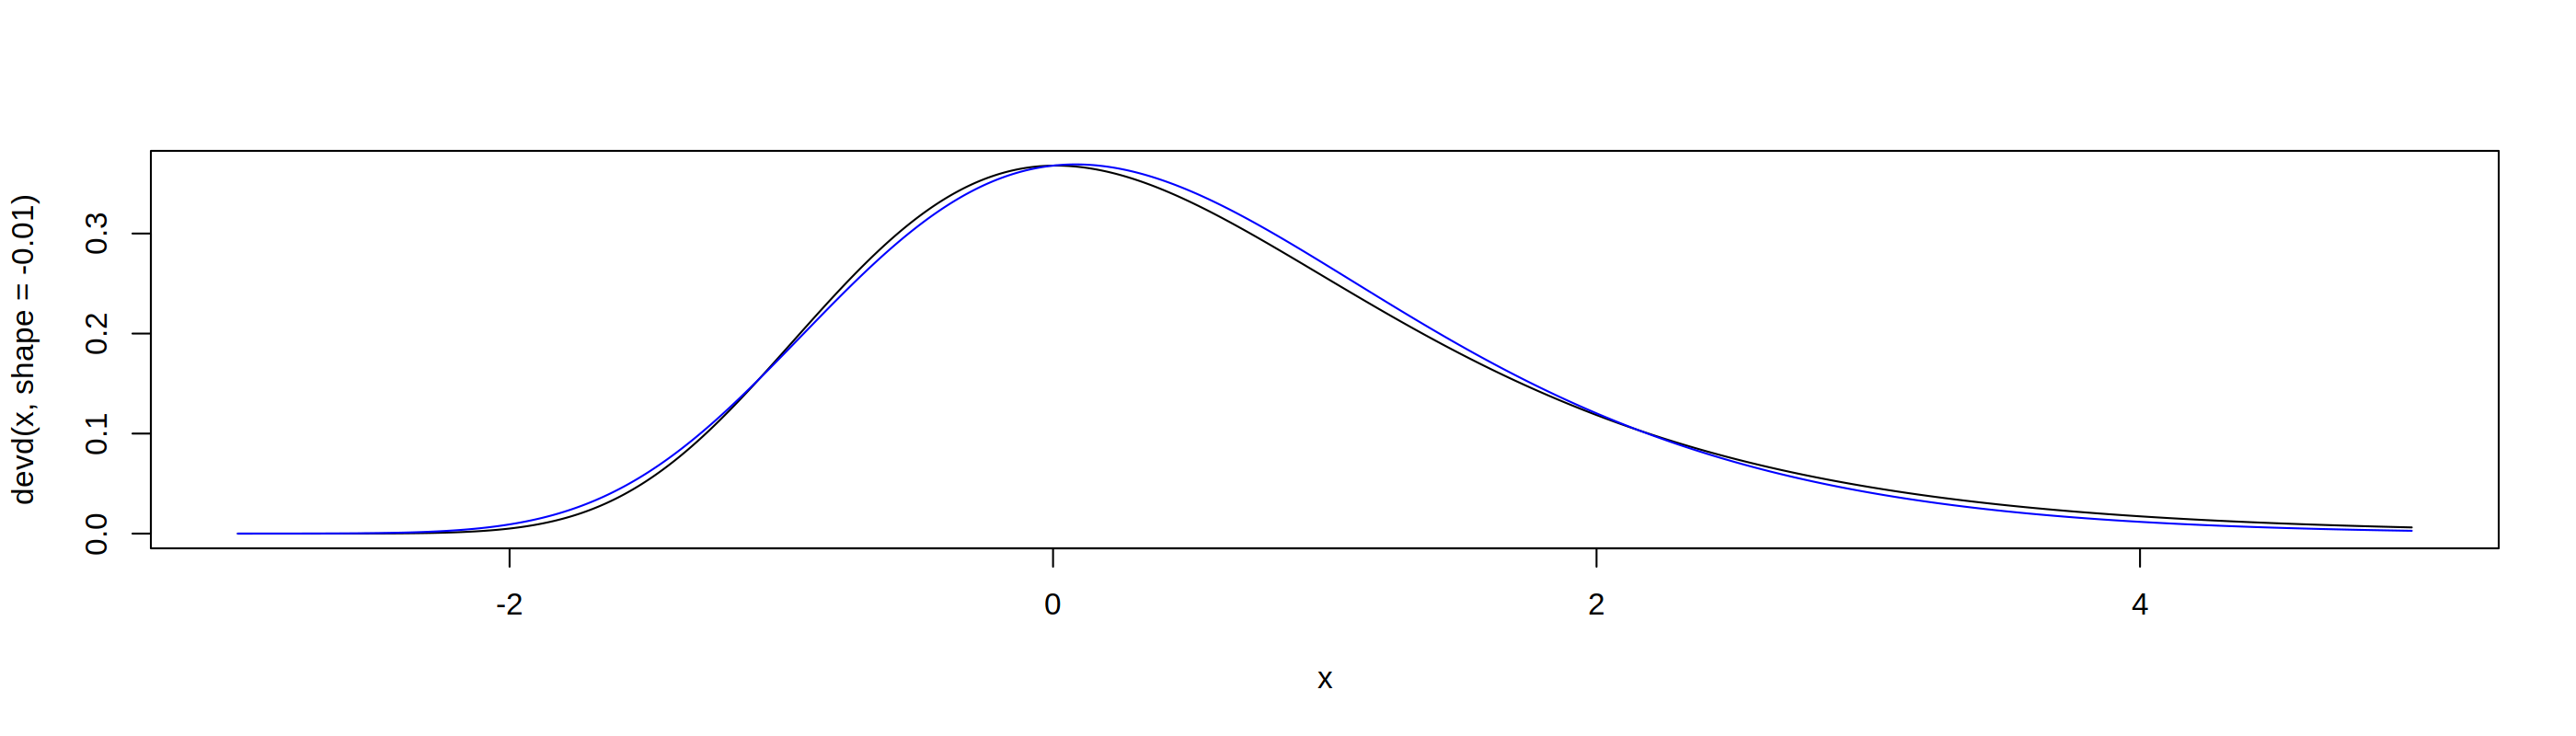

In [297]:
# including 2023 moves shape parameter from -0.01 to -0.08, and impacts RP & PR. What does this actually look like?

x <- seq(-3,5,0.01)
plot(x, devd(x, shape = -0.01), type = "l")
lines(x, devd(x, shape = -0.08), col = "blue")